# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
# 鎖定table

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("本行現金買入: %s, 本行現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

本行現金買入: 28.115, 本行現金賣出: 28.785


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [6]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
req = requests.get(url)
req.encoding = 'utf-8'
soup = BeautifulSoup(req.text, 'lxml')

html = soup.find('table', attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')
for d in html:
    print(d.find('div', attrs = {'class' : "visible-phone print_hide"}).text.replace(" ", ""))
    print("本行現金買入", d.find('td', attrs = {'data-table' : "本行現金買入"}).text)
    print("本行現金賣出", d.find('td', attrs = {'data-table' : "本行現金賣出"}).text)
    print('-------------------------')


美金(USD)

本行現金買入 28.115
本行現金賣出 28.785
-------------------------

港幣(HKD)

本行現金買入 3.522
本行現金賣出 3.726
-------------------------

英鎊(GBP)

本行現金買入 36.64
本行現金賣出 38.76
-------------------------

澳幣(AUD)

本行現金買入 20.38
本行現金賣出 21.16
-------------------------

加拿大幣(CAD)

本行現金買入 21.32
本行現金賣出 22.23
-------------------------

新加坡幣(SGD)

本行現金買入 20.64
本行現金賣出 21.55
-------------------------

瑞士法郎(CHF)

本行現金買入 30.5
本行現金賣出 31.7
-------------------------

日圓(JPY)

本行現金買入 0.2653
本行現金賣出 0.2781
-------------------------

南非幣(ZAR)

本行現金買入 -
本行現金賣出 -
-------------------------

瑞典幣(SEK)

本行現金買入 2.93
本行現金賣出 3.45
-------------------------

紐元(NZD)

本行現金買入 19.26
本行現金賣出 20.11
-------------------------

泰幣(THB)

本行現金買入 0.813
本行現金賣出 1.003
-------------------------

菲國比索(PHP)

本行現金買入 0.5171
本行現金賣出 0.6501
-------------------------

印尼幣(IDR)

本行現金買入 0.00168
本行現金賣出 0.00238
-------------------------

歐元(EUR)

本行現金買入 33.03
本行現金賣出 34.37
-------------------------

韓元(KRW)

本行現金買入 0.02379
本行現金賣出 0.02769
---------------------

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

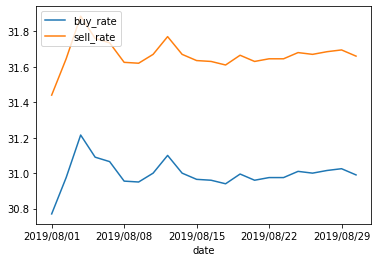

In [9]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
# print(history_table)
#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖

美金(USD)
https://rate.bot.com.tw/xrt/history/USD


<Figure size 1152x720 with 0 Axes>

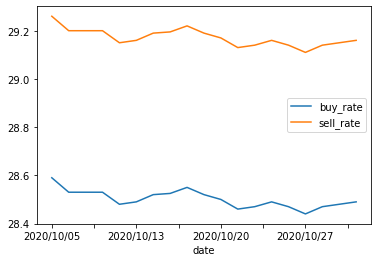

港幣(HKD)
https://rate.bot.com.tw/xrt/history/HKD


<Figure size 1152x720 with 0 Axes>

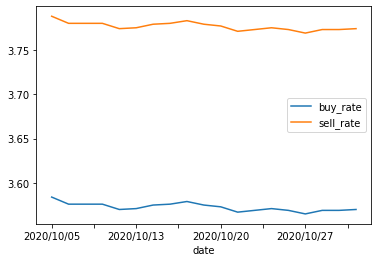

英鎊(GBP)
https://rate.bot.com.tw/xrt/history/GBP


<Figure size 1152x720 with 0 Axes>

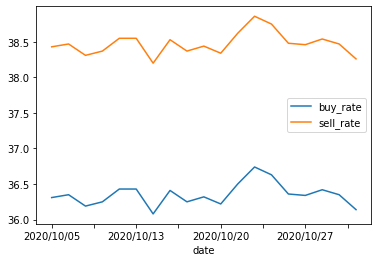

澳幣(AUD)
https://rate.bot.com.tw/xrt/history/AUD


<Figure size 1152x720 with 0 Axes>

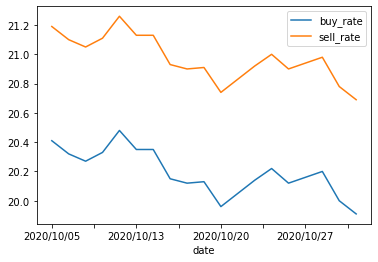

加拿大幣(CAD)
https://rate.bot.com.tw/xrt/history/CAD


<Figure size 1152x720 with 0 Axes>

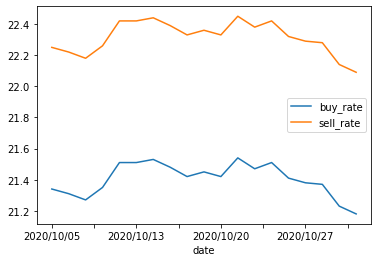

新加坡幣(SGD)
https://rate.bot.com.tw/xrt/history/SGD


<Figure size 1152x720 with 0 Axes>

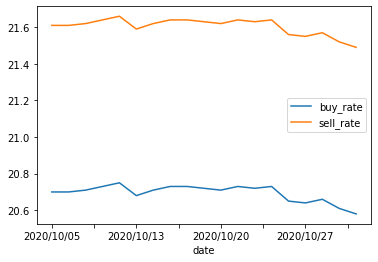

瑞士法郎(CHF)
https://rate.bot.com.tw/xrt/history/CHF


<Figure size 1152x720 with 0 Axes>

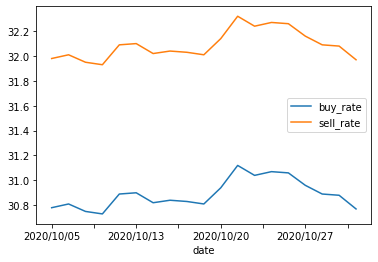

日圓(JPY)
https://rate.bot.com.tw/xrt/history/JPY


<Figure size 1152x720 with 0 Axes>

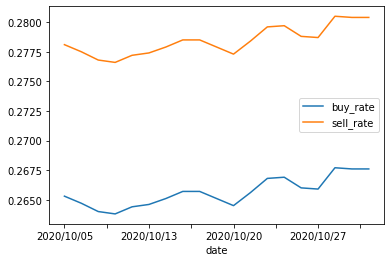

南非幣(ZAR)
https://rate.bot.com.tw/xrt/history/ZAR


<Figure size 1152x720 with 0 Axes>

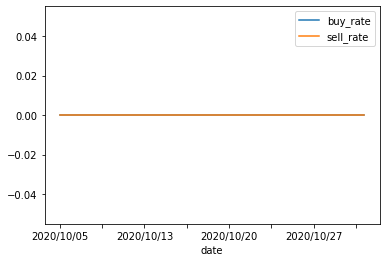

瑞典幣(SEK)
https://rate.bot.com.tw/xrt/history/SEK


<Figure size 1152x720 with 0 Axes>

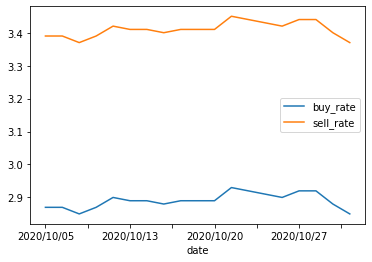

紐元(NZD)
https://rate.bot.com.tw/xrt/history/NZD


<Figure size 1152x720 with 0 Axes>

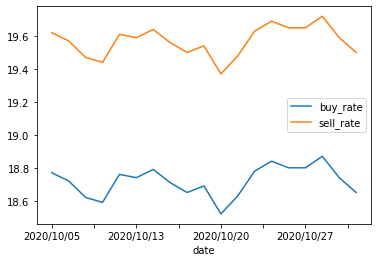

泰幣(THB)
https://rate.bot.com.tw/xrt/history/THB


<Figure size 1152x720 with 0 Axes>

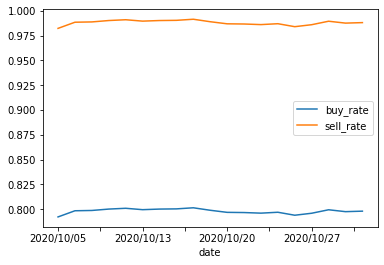

菲國比索(PHP)
https://rate.bot.com.tw/xrt/history/PHP


<Figure size 1152x720 with 0 Axes>

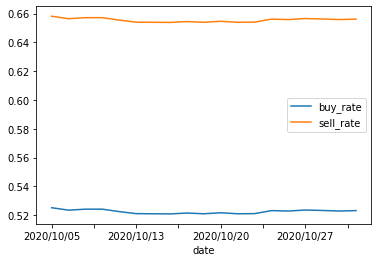

印尼幣(IDR)
https://rate.bot.com.tw/xrt/history/IDR


<Figure size 1152x720 with 0 Axes>

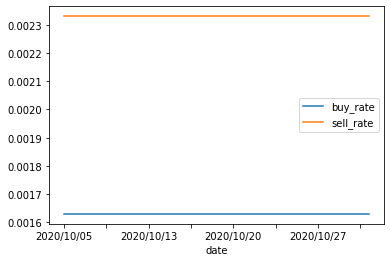

歐元(EUR)
https://rate.bot.com.tw/xrt/history/EUR


<Figure size 1152x720 with 0 Axes>

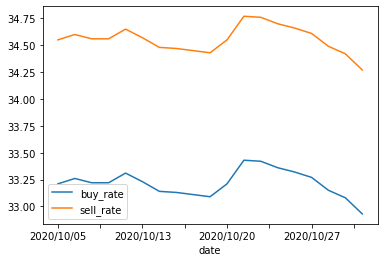

韓元(KRW)
https://rate.bot.com.tw/xrt/history/KRW


<Figure size 1152x720 with 0 Axes>

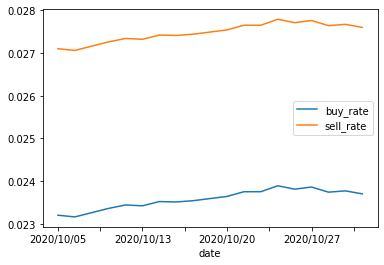

越南盾(VND)
https://rate.bot.com.tw/xrt/history/VND


<Figure size 1152x720 with 0 Axes>

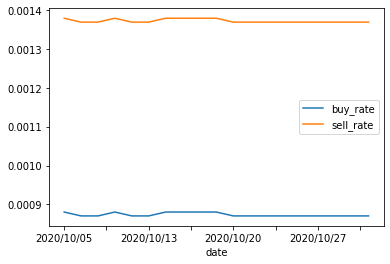

馬來幣(MYR)
https://rate.bot.com.tw/xrt/history/MYR


<Figure size 1152x720 with 0 Axes>

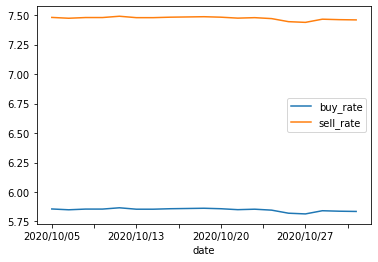

人民幣(CNY)
https://rate.bot.com.tw/xrt/history/CNY


<Figure size 1152x720 with 0 Axes>

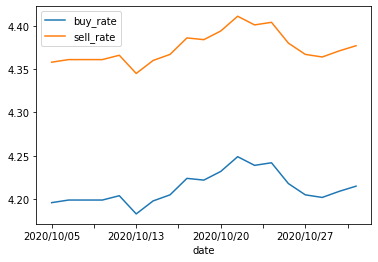

In [12]:
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
req = requests.get(url)
soup = BeautifulSoup(req.text)
html = soup.find('table', attrs = {'title' : '牌告匯率'}).find('tbody').find_all('tr')
# print(html)

for d in html:
    
    # 擷取匯率表格，把美金擷取出來，查詢其歷史匯率
    currency = d.find('div', attrs = {'class' : "visible-phone print_hide"}).text.replace(" ", "").replace('\r\n','')
    print(currency)
    
    # 找該貨幣的歷史資料首頁
    history = d.find('td', attrs = {'data-table' : "歷史匯率"}).a['href']
    history_link = "https://rate.bot.com.tw" + history
    print(history_link)
    
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料,(https://rate.bot.com.tw/xrt/quote/2020-10/USD/spot/1)
    quote_history_link = history_link.replace("history", 'quote/2020-10')
#     print(quote_history_link)
    
    hist_req = requests.get(quote_history_link)
    soup_req = BeautifulSoup(hist_req.text)
    history_table = soup_req.find('table', attrs = {'title' : "歷史本行營業時間牌告匯率"}).find('tbody').find_all('tr')
#     print(history_table)


    # 取日期，買價，賣價
    date_history = list()
    history_sell = list()
    history_buy = list()
    for rate in history_table: 
        # 擷取日期資料
        date_history.append(rate.find(class_ = 'text-center').text)    
        # 歷史買入匯率
        history_buy.append(float(rate.find_all('td', attrs = {'class' : 'rate-content-cash text-right print_table-cell'})[0].text))
        # 歷史賣出匯率
        history_sell.append(float(rate.find_all('td', attrs = {'class' : 'rate-content-cash text-right print_table-cell'})[1].text))

#     print('date', date_history)
#     print('sell', history_sell)
#     print('buy', history_buy)

    # 先做成DataFrame
    history_rate = pd.DataFrame({'date':date_history, 'buy_rate':history_buy, 'sell_rate':history_sell})
    
    # 指定日期欄位為datafram的index
    history_rate = history_rate.set_index('date')
    history_rate = history_rate.sort_index(ascending=True)    
#     print(history_rate)    
    
    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(16, 10))
    history_rate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
#     plt.legend(loc="upper left")
    plt.show()